In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv('/content/drive/MyDrive/bài tập colab/CSV/house_price_Dống-Da_Hà-Nội_subdata.csv')

In [29]:
df

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


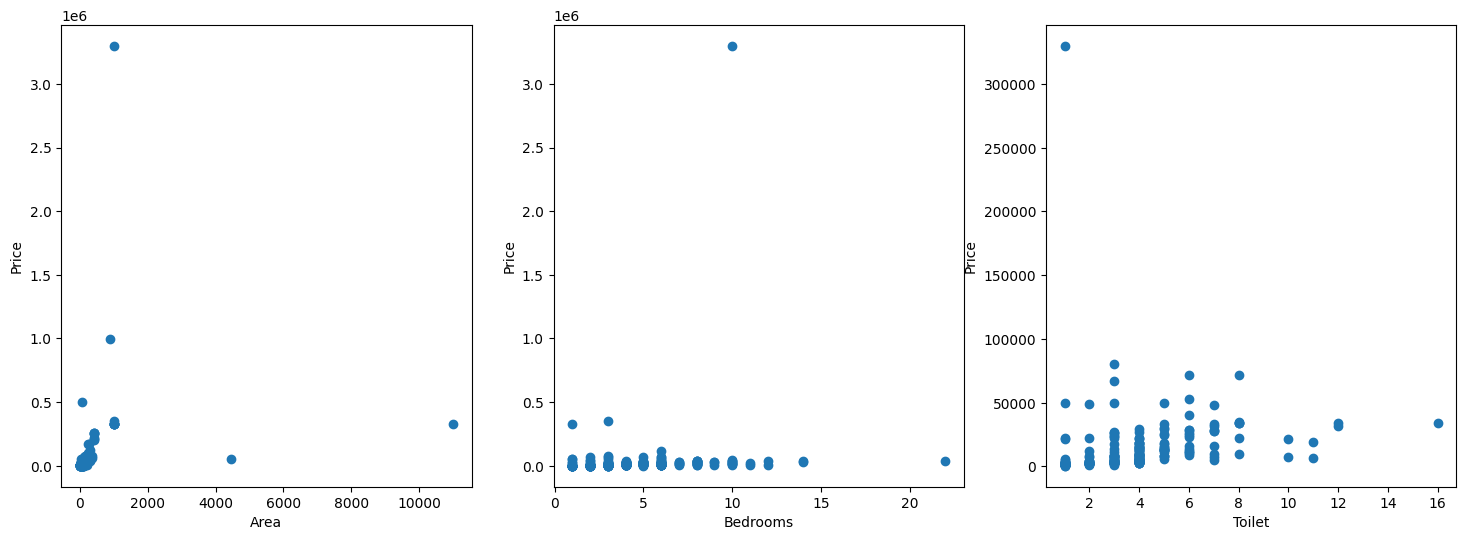

In [36]:
# Biểu đồ phân tích mối liên hệ giữa diện tích, số phòng ngủ, số toilet với giá nhà
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.subplot(1, 3, 2)
plt.scatter(df['bedroom'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.subplot(1, 3, 3)
plt.scatter(df['toilet'], df['price'])
plt.xlabel('Toilet')
plt.ylabel('Price')
plt.show()

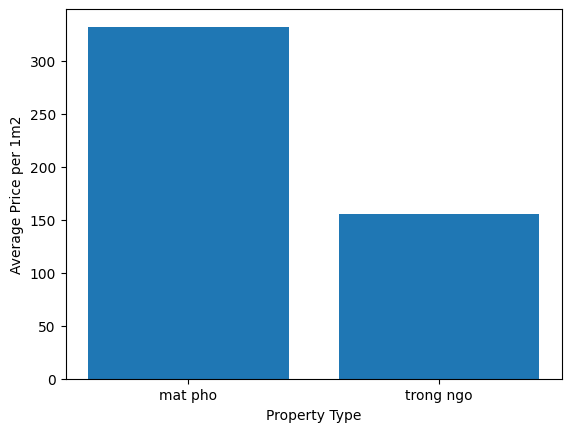

In [47]:
# Tính toán giá nhà trung bình trên 1 m2 cho mỗi hình thức nhà

avg_price_per_1m2 = df.groupby('property_type')['price'].mean() / df.groupby('property_type')['area'].mean()
plt.bar(avg_price_per_1m2.index, avg_price_per_1m2.values)
plt.xlabel('Property Type')
plt.ylabel('Average Price per 1m2')
plt.show()

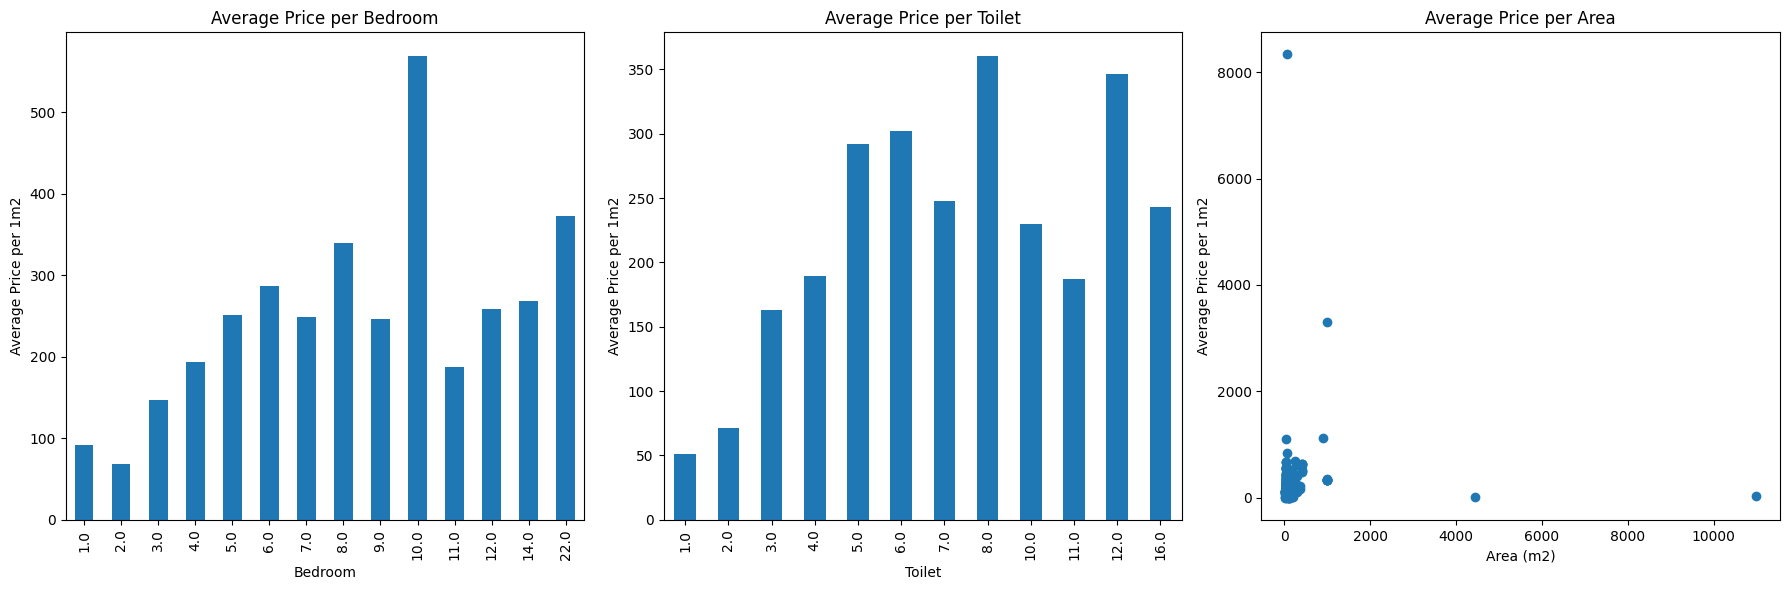

In [49]:
df['avg_price_per_1m2'] = df['price'] / df['area']
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
avg_price_per_bedroom = df.groupby('bedroom')['avg_price_per_1m2'].mean()
avg_price_per_bedroom.plot(kind='bar')
plt.xlabel('Bedroom')
plt.ylabel('Average Price per 1m2')
plt.title('Average Price per Bedroom')

plt.subplot(1, 3, 2)
avg_price_per_bathroom = df.groupby('toilet')['avg_price_per_1m2'].mean()
avg_price_per_bathroom.plot(kind='bar')
plt.xlabel('Toilet')
plt.ylabel('Average Price per 1m2')
plt.title('Average Price per Toilet')

plt.subplot(1, 3, 3)
plt.scatter(df['area'], df['avg_price_per_1m2'])
plt.xlabel('Area (m2)')
plt.ylabel('Average Price per 1m2')
plt.title('Average Price per Area')

plt.tight_layout()
plt.show()